# How it Works - K-Nearest Neghbors with Python - Classified Data Case Study

* Author: Cleiber Garcia
* Version's date: June, 2023

* Pourpose: Develop competencies on how to apply K-Nearest Neighbors machine learning algorithm with Python
* This Notebook was produced as part of my studies of the course 'Python for Data Science and Machine Learning Bootcamp', taught by Mr Jose Portilla, Head of Data Science at Pierian Training. The course is offered ad Udemy (https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/learn/lecture/5784218?start=15#overview). 

* Although the degree of similarity between this notebook and the notebook written by Jose Portillo for this course is almos 100%, I assure you that I wrote it line by line. Also, I took the liberty to make some changes in order to clariry some examples or to make code more readable, when I judged it apropriate.

* For more information, please contact me at cleiber.garcia@gmail.com

# 1. Background

We've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes.

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

# 2. Import Python Modules

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 3. Load the Working Data Set

Set index_col=0 to use the first column as the index.

In [3]:
df = pd.read_csv("Classified Data",index_col=0)

In [4]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


# 4. Standardize the Variables¶
Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [6]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [13]:
# Extract features from df (df columns except 'TARGET CLASS')
df_features = df.drop('TARGET CLASS', axis=1)
df_features.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167


In [14]:
scaler.fit(df_features)

StandardScaler()

In [16]:
scaled_features = scaler.transform(df_features)

In [17]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [21]:
# Create a new dataframe with df's features, scaled between 0 and 1
df_feat_scaled = pd.DataFrame(scaled_features, columns=df_features.columns)
df_feat_scaled.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


# 5. Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [25]:
# Features
X = df_feat_scaled

In [26]:
# Target
y = df['TARGET CLASS']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# 6. Using KNN (K-Nearest Neighbor)

## 6.1 Start with K=1 

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
# Instantiate an object-model
knn = KNeighborsClassifier(n_neighbors=1)

In [30]:
# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [31]:
# Make predictions with the model
predictions = knn.predict(X_test)

## 6.2 Evaluate the results for K=1

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
print(confusion_matrix(y_test, predictions))

[[141  12]
 [ 12 135]]


In [35]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       153
           1       0.92      0.92      0.92       147

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



## 6.3 Choosing other values for K

In [44]:
error_rate = []

max_k = 40

for i in range(1,max_k):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    predictions_i = knn.predict(X_test)
    error_rate.append(np.mean(predictions_i != y_test))

Text(0, 0.5, 'Error Rate')

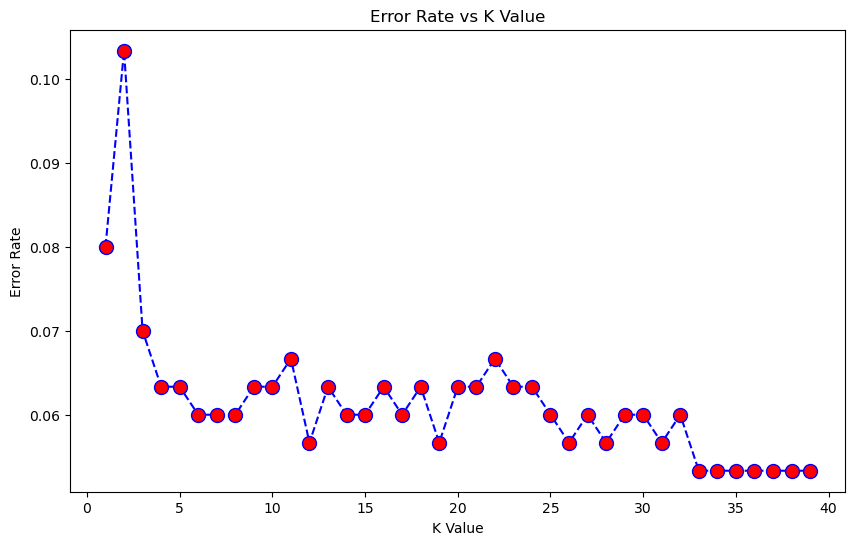

In [45]:
plt.figure(figsize=(10,6))
plt.plot(range(1,max_k), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>33 the error rate stabilize around 0.02 Let's retrain the model with that and check the classification report!

In [50]:
# NOW WITH K=33 (after which is the minimun error rate)
knn = KNeighborsClassifier(n_neighbors=33)

knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

print('WITH K=33')
print('\n')
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

WITH K=33


[[143  10]
 [  6 141]]


              precision    recall  f1-score   support

           0       0.96      0.93      0.95       153
           1       0.93      0.96      0.95       147

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [51]:
# NOW WITH K=2 (most high error rate)
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

print('WITH K=33')
print('\n')
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

WITH K=33


[[145   8]
 [ 23 124]]


              precision    recall  f1-score   support

           0       0.86      0.95      0.90       153
           1       0.94      0.84      0.89       147

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



We can see that with K=33 we have better values for precision and recall, in relation with K=1 and K=2